## 2.2 Introduction to NLTK

1. Now that you have nltk installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

2. Now that you have gone through Chapter 1, let's try some of the nltk functionalities on our own Text!

> Setup. We want to start from a clean version of the ZeldaWiki pages of the characters. A version with as little wiki-markup as possible. We needed it earlier to get the links, gender, etc., but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the ZeldaWiki API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/ZeldaBotW_nodes_w_attributes_enriched.csv) of the characters with pandas `pd.read_csv()` and assign it to `df_characters`;
> * use the same code you have used to query the API before (remember the baseurl is `https://zelda.fandom.com/api.php?`), but change the parameter `content` in `content="prop=extracts&exlimit=1&explaintext"`;
> * loop through the `Name` column of df_characters and for each name make a request to the API
>     * **Note1** replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_CHARACTER_HERE)` to build your title;
>     * **Note2** take care of `Cherry` (remember the title of her page is different).
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note3** the key you are looking for is now `extract` not `*`
>
> Use this method to retrive a nice copy of all BotW characters's text. Save each character's text in a txt file and collect them all in a new folder!

> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_characters`, e.g., Baddek.txt first, Bamboo.txt second etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the ZeldaWiki corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [ ]:
import nltk
import pandas as pd
nltk.download("book")
from nltk.book import *
import pandas as pd

In [5]:
#url = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ZeldaBotW_nodes_w_attributes_enriched.csv'
#df_characters = pd.read_csv(url)
#df_characters.head()

,Name,Role,Race,Gender
0,Baddek,Ally,Hylian,Male
1,Bamboo,Ally,Horse,Unknown
2,Banji,Ally,Hylian,Female
3,Baumar,Ally,Hylian,Male
4,Bayge,Ally,Goron,Male


In [7]:
df_characters = pd.read_csv('ZeldaBotW_nodes_w_attributes_enriched.txt')

In [11]:
import urllib
import json 
base_url = 'https://zelda.fandom.com/api.php?action=query&titles='
end_url = '&prop=extracts&exlimit=1&explaintext=content&format=json'


clean_name = []
for name in df_characters.Name:
    if name == "Cherry":
        clean_name = "Ancient Oven"
    else:
        clean_name = name
    clean_name = (clean_name.replace(" ","_"))
    res_name = urllib.parse.quote_plus(clean_name)
    response = urllib.request.urlopen(base_url + res_name + end_url)
    response = response.read()
    response = response.decode("utf-8")
    text = json.loads(response)
    id = list(text['query']['pages'].keys())[0]
    clean_text = text['query']['pages'][str(id)]['extract']
    with open('characters_clean_text/' + name + '.txt', 'w', encoding="utf-8") as file:
        file.write(clean_text)
    

In [12]:
file_names = [name + ".txt" for name in df_characters.Name]

In [13]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = "characters_clean_text/"
botw_corpus = PlaintextCorpusReader(corpus_root, file_names)

In [14]:
botw_text = nltk.Text(botw_corpus.words())

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the ZeldaWiki Text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the ZeldaWiki text and a word of your own choosing.
> * Also try out the `similar` and `common_contexts` methods, again with any word/s you like.
> * Create the ZeldaWiki version of a dispersion plot:
>    1. try with the words `['attack','help']`. What do you observe? (**hint:** we ordered characters as they appear in df_characters)
>    2. find the top 6 races of allies by counting how many characters of each race there are in `df_characters`. Save the list of races and use it to create a new dispersion plot. What do you observe? (**hint:** look at how allies were originally ordered in the [Zelda Wiki](https://zelda.fandom.com/wiki/Characters_in_Breath_of_the_Wild))
>    3. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).
> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the ZeldaWiki Text.
> * Review the discussion of conditionals in Sec. 4. Find all words in the ZeldaWiki Text starting with the letter *b*. Show the first 5 in alphabetical order.
> * Use `.index()` to find the index of the word *Cherry*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.
> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the ZeldaWiki Text and print the 5 longest uppercase words, one per line.

In [15]:
# Try concordance
botw_text.concordance("Link")

Displaying 25 of 4513 matches:
se - tinted glasses ". He also tells Link that he only talks about Horses . Wh
ic . Occasionally , Baddek will give Link tips for handling Horses , saying to
od behavior . In addition , he tells Link that he can ' t expect a horse to ri
y need to . After this , he ' ll ask Link to name another animal that swims , 
there aren ' t any . He also informs Link that Stables fit registered Horses w
prisingly comfortable . Baddek tells Link that there are four different Stable
d these are simply the Stables where Link can have a worker change the gear of
s ". During this time , he ' ll give Link a quiz on Horses . He lists four dif
orse , and the bone Horse — and asks Link which one doesn ' t exist . He says 
ealed someday , somewhere , and that Link may already know it . Occasionally ,
anji speaks about Ludfo ' s Bog . If Link has not yet completed the trials on 
 a sign from Hylia to stay away . If Link has completed the trials , she will 
 be the doing of Hyli

In [16]:
# Try similar
botw_text.similar('love')

time request link side name house help foot life ocarina guardian
statue defeat power body secret mother triforce soul awakening


In [17]:
# Try common contexts
botw_text.common_contexts(['Link','Horse'])

a_to that_s of_is their_s the_and


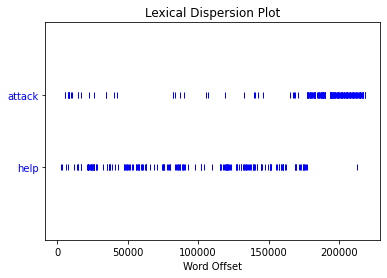

In [18]:
# Make a dispersion plot
botw_text.dispersion_plot(["attack", "help"])

In [19]:
# Find 6 most common Ally races
counter = {race:0 for race in df_characters.Race.unique()}
for index, row in df_characters.iterrows():
    if row.Role == "Ally":
        counter[row.Race] += 1
counter_list = list(sorted(counter.items(), key=lambda item: item[1]))
race_list = []
for race in counter_list[-6:]:
    print(race)
    race_list.append(race[0])

('Rito', 27)
('Zora', 30)
('Goron', 36)
('Gerudo', 76)
('Sheikah', 138)
('Hylian', 215)


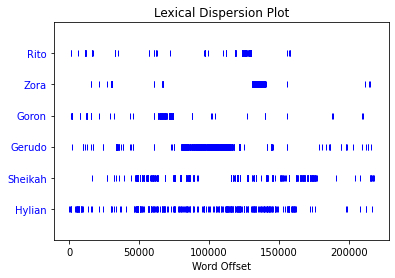

In [20]:
# Dispersion plot for  6 most common Ally races
botw_text.dispersion_plot(race_list)

In [21]:
# Botw collacations
botw_text.collocations()

See Also; Divine Beast; Gerudo Town; Beast Vah; Ancient Shrine;
Calamity Ganon; Side Quest; Link speaks; Princess Zelda; Hyrule
Castle; Sheikah Slate; Zelda series; Wind Waker; years prior; 000
years; Sheikah Monk; someone bearing; Old Man; may refer; tells Link


In [22]:
sorted(w for w in set(botw_text) if w.startswith('b'))[:5]

['baby', 'back', 'backfires', 'backflips', 'background']

In [23]:
# Get index of Cherry and try to find slices that provide the character bio
print("Index of Character named Cherry is : ", botw_text.index("Cherry"))
botw_text[48159:48177]

Index of Character named Cherry is :  49990


['.',
 'Tenne',
 'is',
 'a',
 'young',
 'female',
 'Hylian',
 'stable',
 'hand',
 'who',
 'can',
 'be',
 'found',
 'tending',
 'the',
 'hay',
 'troph',
 'at']

In [24]:
upper_dict = {}
for token in botw_text:
    if token.isupper():
        if(len(token))>2:
            if token in upper_dict:
                continue
            else:
                upper_dict[token] = len(token)
                
upper_list = list(sorted(upper_dict.items(),reverse=True, key=lambda item: item[1])[:5])
for word,length in upper_list:
    print(word)


CRAAAAACK
BOOOOOM
BZZBZZT
BZZBZZ
3000HP


> *Exercise 2*: Basic stats
>
> * How many tokens are there in the ZeldaWiki Text? How many distinct tokens are there?
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the ZeldaWiki Text;
>     2. Compute the lexical diversity related to allies and enemies (bosses inlcuded). Comment your results.
> * Create frequency distributions for the ZeldaWiki Text, including the cumulative frequency plot for the 75 most common tokens. 
> * Find all the four-letter tokens in the ZeldaWiki Text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.
> * What does the following code do? `sum(len(w) for w in ZeldaWiki)` Can you use it to work out the average token length of the ZeldaWiki Text?
> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the ZeldaWiki Text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the ZeldaWiki Text to compute the percentage for *Link* (our beloved hero)

In [25]:
# How many tokens 
len(botw_text)

218435

In [26]:
# How many distinct tokens
len(set(botw_text))

10835

In [27]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

print("Lexical Diversity of botw corpus = ",lexical_diversity(botw_text))

Lexical Diversity of botw corpus =  0.04960285668505505


In [28]:
df_ally = df_characters[df_characters['Role'] == "Ally"]
df_enemy = df_characters[df_characters['Role'] != "Ally"]

ally_file_names = [name+".txt" for name in df_ally.Name]
enemy_file_names = [name+".txt" for name in df_enemy.Name]

ally_botw_corpus = PlaintextCorpusReader(corpus_root, ally_file_names)
enemy_botw_corpus = PlaintextCorpusReader(corpus_root, enemy_file_names)

ally_botw_text = nltk.Text(ally_botw_corpus.words())
enemy_botw_text = nltk.Text(enemy_botw_corpus.words())

print("Lexical Diversity of Allies corpus = ",lexical_diversity(ally_botw_text))
print("Lexical Diversity of Enemies corpus = ", lexical_diversity(enemy_botw_text))

Lexical Diversity of Allies corpus =  0.053252135667766216
Lexical Diversity of Enemies corpus =  0.0990508639571672


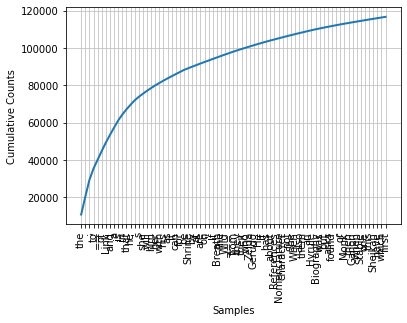

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [29]:
freq_dist = FreqDist(botw_text)
freq_dist.most_common(75)
freq_dist.plot(75,cumulative=True)

In [30]:
freq_dist_2 = FreqDist(w for w in botw_text if len(w)==4)

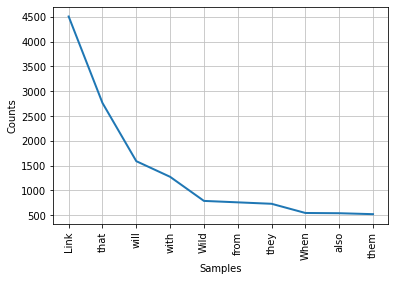

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
freq_dist_2.plot(10)

What does the following code do? sum(len(w) for w in ZeldaWiki) Can you use it to work out the average token length of the ZeldaWiki Text?

$\textbf{Answer :}$

The code above counts the number of characters in the entire wiki by counting the length of each word. 
We can divide the output of above with the number of words in the corpus and get an average token length

In [32]:
def vocab_size(text):
    return len(text)

print("Vocabulary size of the ZeldaWiki text is : ", vocab_size(botw_text))

Vocabulary size of the ZeldaWiki text is :  218435


In [33]:
def percent(word,text):
    return (text.count(word)/vocab_size(text)) * 100 

print("The percentage of the word Link is : ", percent("Link",botw_text))

The percentage of the word Link is :  2.0619406230686472


# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the Zelda Wiki. But that's not the only source of text in the universe. In fact, it's far from it . Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](http://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>

### Exercise 4
Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [34]:
# State of the Union Corpus
from nltk.corpus import state_union

In [35]:
print("Count of word men: ", state_union.words().count("men"))
print("Count of word women: ", state_union.words().count("women"))
print("Count of word people: ", state_union.words().count("people"))

Count of word men:  228
Count of word women:  141
Count of word people:  1291


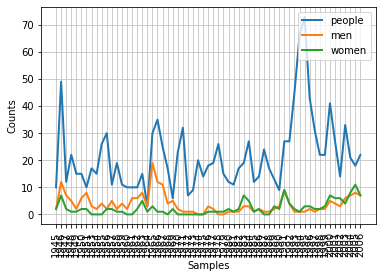

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women','people']
    if w.lower() == target)
cfd.plot()

### Exercise 8 
Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females

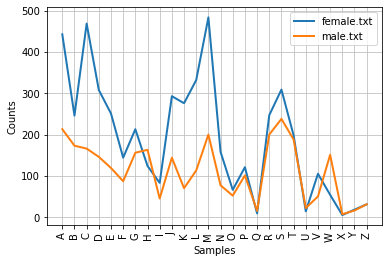

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

### Exercise 11
Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [41]:
from nltk.corpus import brown
pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'they']
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor', 'editorial', 'belles_lettres', 'government']
cfd.tabulate(conditions=genres, samples=pronouns)



                   I  you   he  she   it   we they 
           news  179   55  451   42  363   77  205 
       religion  155  100  137   10  264  176  115 
        hobbies  154  383  155   21  476  100  177 
science_fiction   98   81  139   36  129   30   53 
        romance  951  456  702  496  573   78  168 
          humor  239  131  146   58  162   32   70 
      editorial  201   83  268   41  386  167  148 
 belles_lettres  845  188 1174  178 1059  398  488 
     government   97   74  120    0  218  112   92 


In [42]:
wh = ['what', 'when', 'who', 'why', 'where']
cfd.tabulate(conditions=genres, samples=wh)

                 what  when   who   why where 
           news    76   128   268     9    58 
       religion    64    53   100    14    20 
        hobbies    78   119   103    10    72 
science_fiction    27    21    13     4    10 
        romance   121   126    89    34    54 
          humor    36    52    48     9    15 
      editorial    84   103   172    10    40 
 belles_lettres   244   252   452    36   107 
     government    43    56    74     6    46 


### Exercise 15
Write a program to find all words that occur at least three times in the Brown Corpus.

In [43]:
fd = nltk.FreqDist(brown.words())
triple_words = [w for w in fd.keys() if fd[w] > 2]
print(len(brown.words()))
print(len(triple_words))

1161192
22339


### Exercise 16
Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [44]:
def lexical_diversity(text):
    return  len(set(text)) / len(text)


lexical_diversities = []    
tokens = []
types = []
genres = nltk.corpus.brown.categories()

for genre in genres:
    lexical_diversities.append(lexical_diversity(brown.words(categories=genre)))
    print(genre + ': ' + str(lexical_diversity(brown.words(categories=genre))))
    


adventure: 0.1279743878169075
belles_lettres: 0.10642071451679992
editorial: 0.16054152327770924
fiction: 0.1358194136199042
government: 0.11667641228232811
hobbies: 0.14493897625842492
humor: 0.23125144042406084
learned: 0.09268890745953554
lore: 0.13148804612915801
mystery: 0.12212912592488936
news: 0.14314696580941583
religion: 0.1617553745018909
reviews: 0.21192020440251572
romance: 0.12070492131044529
science_fiction: 0.22342778161713892


In [45]:
for text in brown.categories():
    print(text)

adventure
belles_lettres
editorial
fiction
government
hobbies
humor
learned
lore
mystery
news
religion
reviews
romance
science_fiction


### Exercise 17
Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [46]:
def most_frequent_content_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content_words = [w.lower() for w in text if w.lower() not in stopwords and any(c.isalpha() for c in w)]
    fd = nltk.FreqDist(content_words)
    return [w for w, num in fd.most_common(50)]

print(most_frequent_content_words(brown.words()))

['one', 'would', 'said', 'new', 'could', 'time', 'two', 'may', 'first', 'like', 'man', 'even', 'made', 'also', 'many', 'must', 'af', 'back', 'years', 'much', 'way', 'well', 'people', 'mr.', 'little', 'state', 'good', 'make', 'world', 'still', 'see', 'men', 'work', 'long', 'get', 'life', 'never', 'day', 'another', 'know', 'last', 'us', 'might', 'great', 'old', 'year', 'come', 'since', 'go', 'came']


### Exercise 18
Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [47]:
def most_frequent_bigrams(text):
    stopwords = nltk.corpus.stopwords.words('english')
    bigrams = [b for b in nltk.bigrams(text) if b[0] not in stopwords and b[1] not in stopwords and any(c.isalpha() for c in b[0]) and any(c.isalpha() for c in b[1])]
    fd = nltk.FreqDist(bigrams)
    return [b for b, num in fd.most_common(50)]

print(most_frequent_bigrams(brown.words()))

[('United', 'States'), ('New', 'York'), ('per', 'cent'), ('years', 'ago'), ('I', 'could'), ('I', 'think'), ('I', 'said'), ('I', 'would'), ('I', 'know'), ('The', 'first'), ('He', 'said'), ('Rhode', 'Island'), ('Of', 'course'), ('could', 'see'), ('In', 'addition'), ('I', 'thought'), ('last', 'year'), ('first', 'time'), ('It', 'would'), ('White', 'House'), ('For', 'example'), ('even', 'though'), ('I', 'saw'), ('I', 'knew'), ('World', 'War'), ('He', 'could'), ('two', 'years'), ('fiscal', 'year'), ('U.', 'S.'), ('In', 'fact'), ('But', 'I'), ('last', 'night'), ('I', 'want'), ('high', 'school'), ('Peace', 'Corps'), ('I', 'told'), ('old', 'man'), ('He', 'would'), ('I', 'believe'), ('United', 'Nations'), ('New', 'England'), ('No', 'one'), ('The', 'man'), ('young', 'man'), ('Los', 'Angeles'), ('one', 'thing'), ('I', 'felt'), ('I', 'asked'), ('I', "can't"), ('I', 'went')]
